<a href="https://colab.research.google.com/github/Akshita0501/OIBSIP/blob/main/Car_Price_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/car_price.zip'

# Directory to extract the files
extracted_path = '/content/car_price_dataset'

# Create the directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)


In [ ]:
import pandas as pd

# Load the dataset
car_data_path = os.path.join(extracted_path, 'car data.csv')
car_df = pd.read_csv(car_data_path)

# Display the first few rows of the dataset
print(car_df.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Display the columns of the dataset
print(car_df.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


Training a car price prediction model:

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
car_df['Fuel_Type'] = label_encoder.fit_transform(car_df['Fuel_Type'])
car_df['Selling_type'] = label_encoder.fit_transform(car_df['Selling_type'])
car_df['Transmission'] = label_encoder.fit_transform(car_df['Transmission'])

# Display the updated dataset
print(car_df.head())




  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0  


In [ ]:
# Split the data into features (X) and target variable (y)
X = car_df.drop('Selling_Price', axis=1)
y = car_df['Selling_Price']


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:


# Make predictions on the test set
y_pred = model.predict(X_test_numeric)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# Display the columns in X_train
print(X_train.columns)


Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')


In [ ]:
# One-hot encode remaining categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Align columns in X_train_encoded and X_test_encoded
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Verify the updated datasets
print(X_train_encoded.head())
print(X_test_encoded.head())

# Now, train the linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


     Driven_kms  Fuel_Type_1  Fuel_Type_2  Owner  Present_Price  \
184       26000            0            1      1          0.750   
132        3500            0            1      0          0.950   
194       50000            0            1      0          0.787   
75        36000            0            1      0          6.800   
111        8700            0            1      0          1.500   

     Selling_type_1  Transmission_1  Year  
184               1               1  2008  
132               1               1  2017  
194               1               1  2008  
75                0               1  2015  
111               1               1  2016  
     Driven_kms  Fuel_Type_1  Fuel_Type_2  Owner  Present_Price  \
177       24000            0            1      0           0.57   
289       10980            0            1      0          13.60   
228       60000            0            0      0           9.40   
198       35000            0            1      1           0.57  

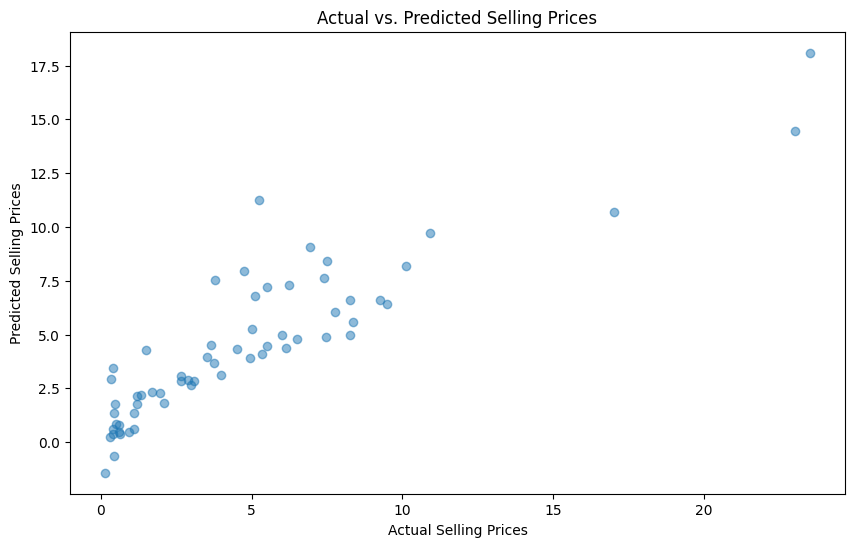

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted selling prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Selling Prices')
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.show()


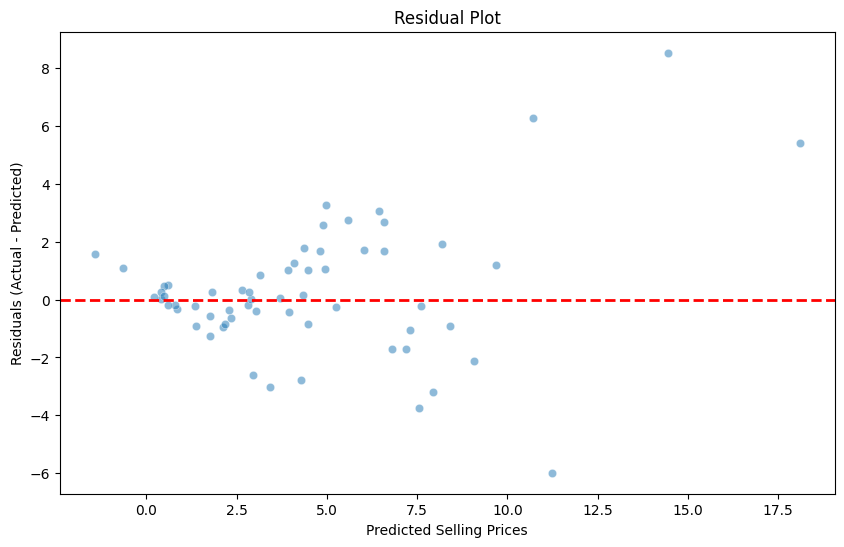

In [ ]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Selling Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


In [ ]:
def predict_car_price(model, input_data):
    input_df = pd.DataFrame([input_data])

    # One-hot encode categorical variables
    input_df_encoded = pd.get_dummies(input_df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

    # Ensure the input data has the same columns as the model was trained on
    input_df_encoded, _ = X_train_encoded.align(input_df_encoded, join='outer', axis=1, fill_value=0)

    # Make predictions
    predicted_price = model.predict(input_df_encoded)

    return predicted_price[0]

# Example usage:
input_data = {
    'Year': 2016,
    'Present_Price': 8.5,
    'Driven_kms': 30000,
    'Fuel_Type': 'Petrol',
    'Selling_type': 'Dealer',
    'Transmission': 'Automatic',
    'Owner': 1
}

predicted_price = predict_car_price(model, input_data)
print(f'Predicted Selling Price: {predicted_price:.2f} lakhs')


Predicted Selling Price: -2.35 lakhs
